In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import explore as e
import prepare
import warnings
warnings.filterwarnings("ignore")
import plotly.express


In [2]:
# set train equal to the prepared dataframe
df = prepare.prepare_edu()
train, validate, test = prepare.split(df)

In [3]:
# sns.pairplot(train.sample(3000),corner=True)

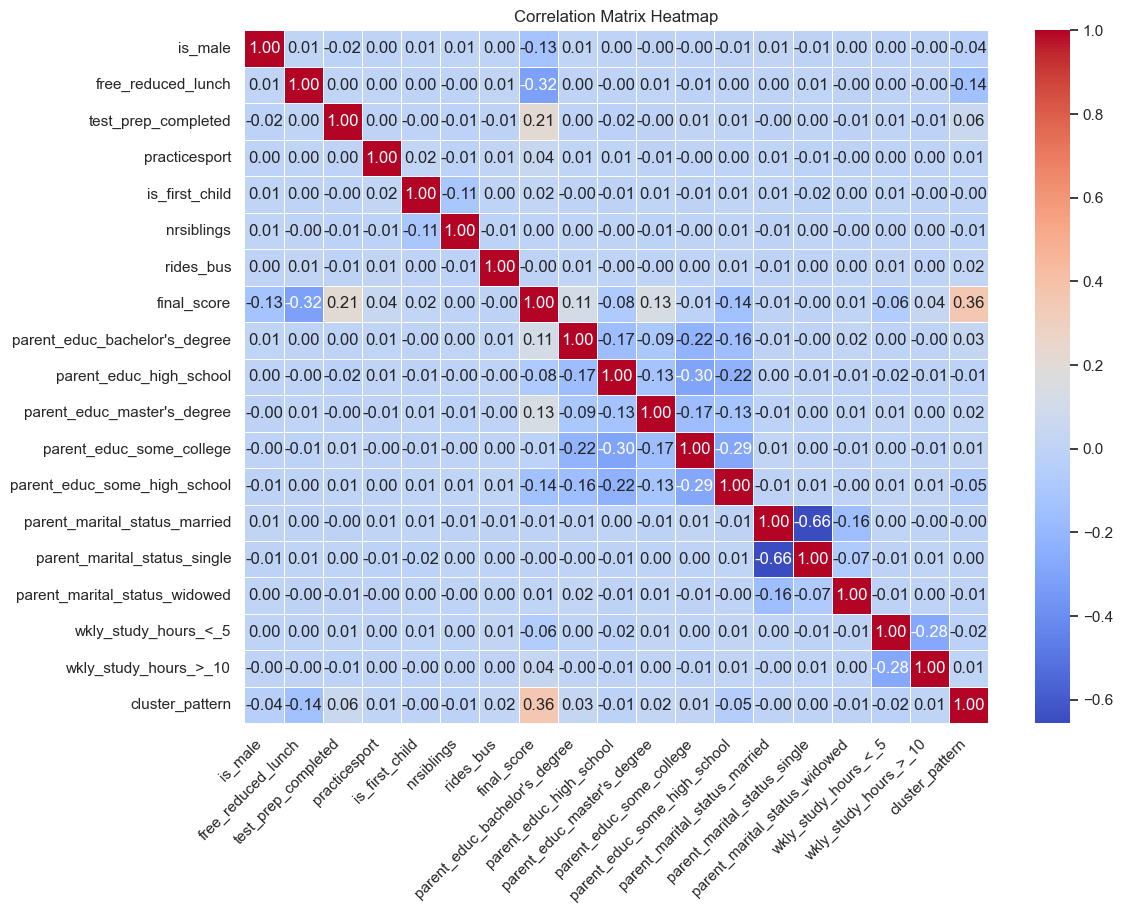

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data'
correlation_matrix = train.corr()

# Set up the size and style of the heatmap
plt.figure(figsize=(12, 9))
sns.set(style="white")

# Create the heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize the plot appearance
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)

# Show the heatmap
plt.show()


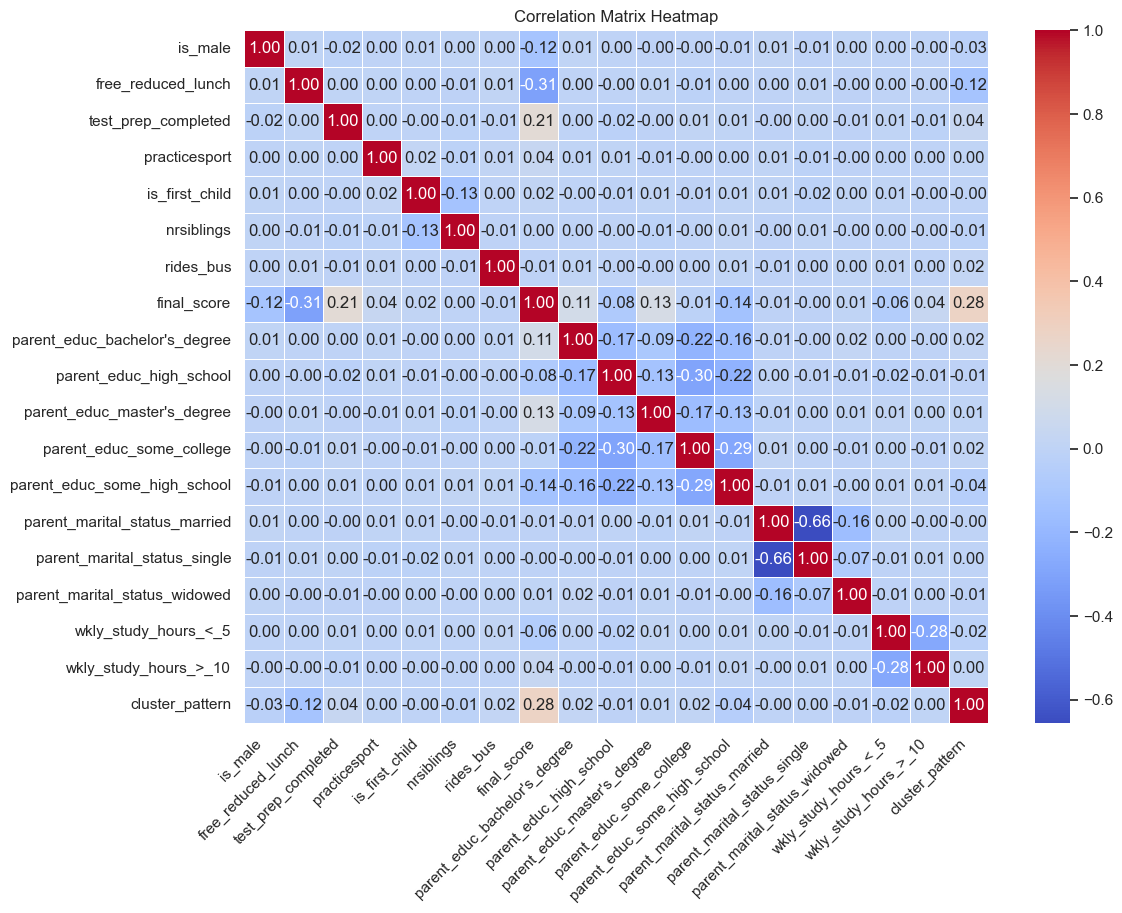

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data'
correlation_matrix = train.corr(method='spearman')


# Set up the size and style of the heatmap
plt.figure(figsize=(12, 9))
sns.set(style="white")

# Create the heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize the plot appearance
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)

# Show the heatmap
plt.show()


## There seems to be a lot of noise with our data so we are only gonna focus on our final score for this project.

In [4]:
round(df['final_score'],0).astype(int)

0        72
1        82
2        90
3        48
4        76
         ..
30636    62
30637    54
30638    66
30639    88
30640    61
Name: final_score, Length: 30632, dtype: int64

In [5]:
train.drop(columns = ['reading_score', 'math_score', 'writing_score'], inplace=True)

In [6]:
## Now i want to run a correlation chart in 

In [7]:
pd.set_option('display.max_columns', None)
train.corr()

is_male  free_reduced_lunch  \
is_male                        1.000000            0.006219   
free_reduced_lunch             0.006219            1.000000   
test_prep_completed           -0.015289            0.004251   
practicesport                  0.002850            0.004595   
is_first_child                 0.009968            0.002245   
nrsiblings                     0.007690           -0.002353   
rides_bus                      0.003133            0.012341   
final_score                   -0.126272           -0.316211   
parent_educ_bachelor's_degree  0.005185            0.001861   
parent_educ_high_school        0.000142           -0.000437   
parent_educ_master's_degree   -0.003831            0.006419   
parent_educ_some_college      -0.001308           -0.012730   
parent_educ_some_high_school  -0.006745            0.000903   
parent_marital_status_married  0.014942            0.000848   
parent_marital_status_single  -0.008271            0.005274   
parent_marital_status_widowed  0.003975           -0.002984   
wkly_study_hours_<_5           0.001486            0.003194   
wkly_study_hours_>_10         -0.002142           -0.000013   

                               test_prep_completed  practicesport  \
is_male                                  -0.015289       0.002850   
free_reduced_lunch                        0.004251       0.004595   
test_prep_completed                       1.000000       0.000701   
practicesport                             0.000701       1.000000   
is_first_child                           -0.000377       0.016574   
nrsiblings                               -0.010927      -0.009606   
rides_bus                                -0.007624       0.010094   
final_score                               0.214653       0.043364   
parent_educ_bachelor's_degree             0.001272       0.005287   
parent_educ_high_school                  -0.018098       0.005463   
parent_educ_master's_degree              -0.004599      -0.006901   
parent_educ_some_college                  0.010510      -0.001705   
parent_educ_some_high_school              0.005644       0.003144   
parent_marital_status_married            -0.003244       0.006359   
parent_marital_status_single              0.004054      -0.009693   
parent_marital_status_widowed            -0.005668      -0.003852   
wkly_study_hours_<_5                      0.009884       0.003072   
wkly_study_hours_>_10                    -0.011166       0.002199   

                               is_first_child  nrsiblings  rides_bus  \
is_male                              0.009968    0.007690   0.003133   
free_reduced_lunch                   0.002245   -0.002353   0.012341   
test_prep_completed                 -0.000377   -0.010927  -0.007624   
practicesport                        0.016574   -0.009606   0.010094   
is_first_child                       1.000000   -0.111553   0.001729   
nrsiblings                          -0.111553    1.000000  -0.012474   
rides_bus                            0.001729   -0.012474   1.000000   
final_score                          0.016629    0.000326  -0.003626   
parent_educ_bachelor's_degree       -0.001375    0.003651   0.008684   
parent_educ_high_school             -0.005324   -0.000790  -0.001802   
parent_educ_master's_degree          0.007586   -0.012591  -0.002218   
parent_educ_some_college            -0.007907   -0.000785   0.000114   
parent_educ_some_high_school         0.007045    0.009203   0.007088   
parent_marital_status_married        0.007094   -0.005248  -0.008201   
parent_marital_status_single        -0.015116    0.004003   0.002987   
parent_marital_status_widowed        0.004253   -0.000294   0.004596   
wkly_study_hours_<_5                 0.006381    0.000674   0.014158   
wkly_study_hours_>_10               -0.001549    0.000661   0.001170   

                               final_score  parent_educ_bachelor's_degree  \
is_male                          -0.126272                       0.005185   

<Axes: >

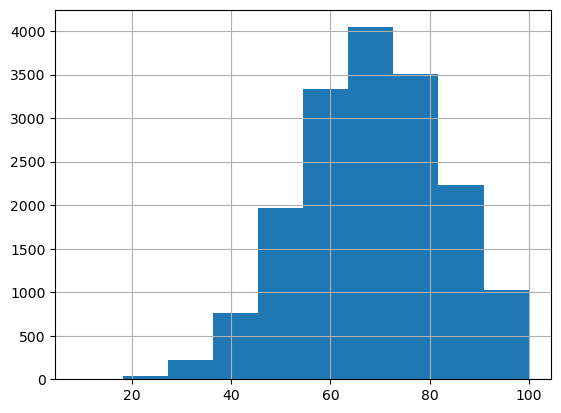

In [8]:
train.final_score.hist()

# Finding The risk categories 

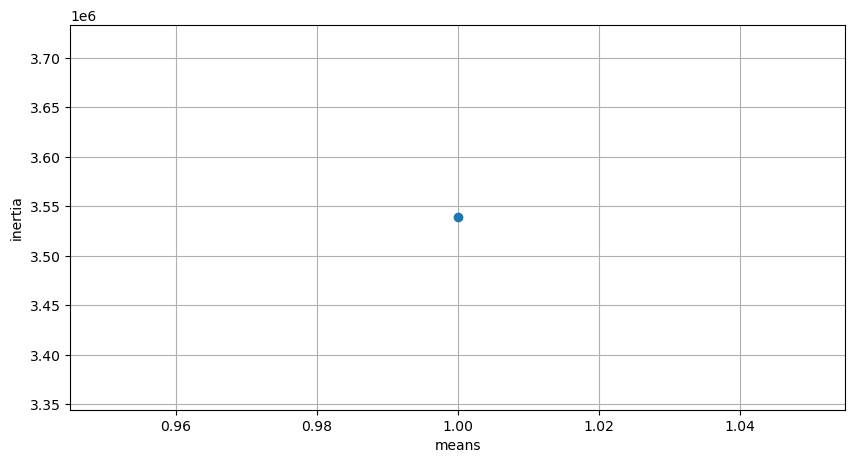

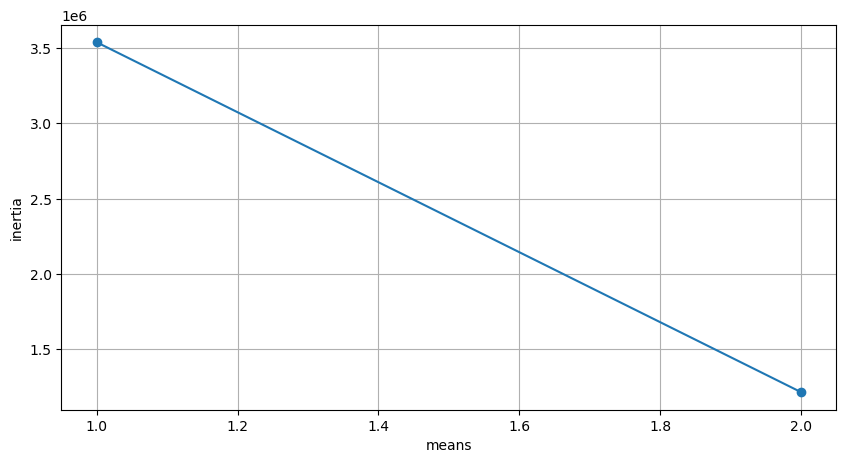

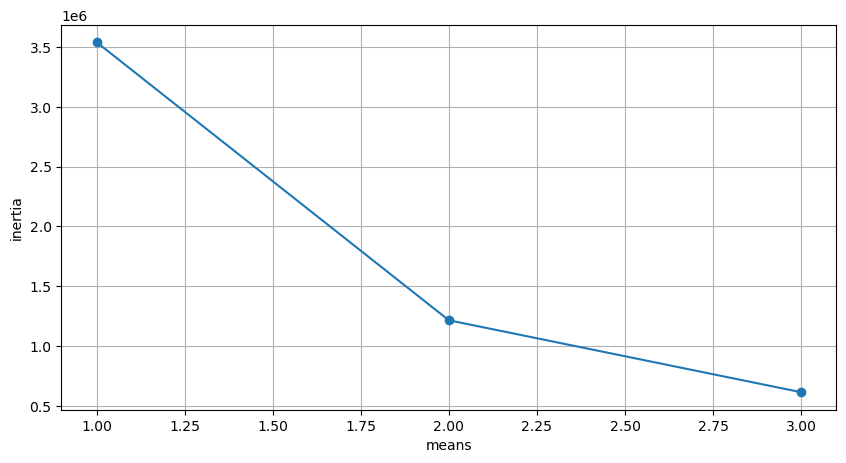

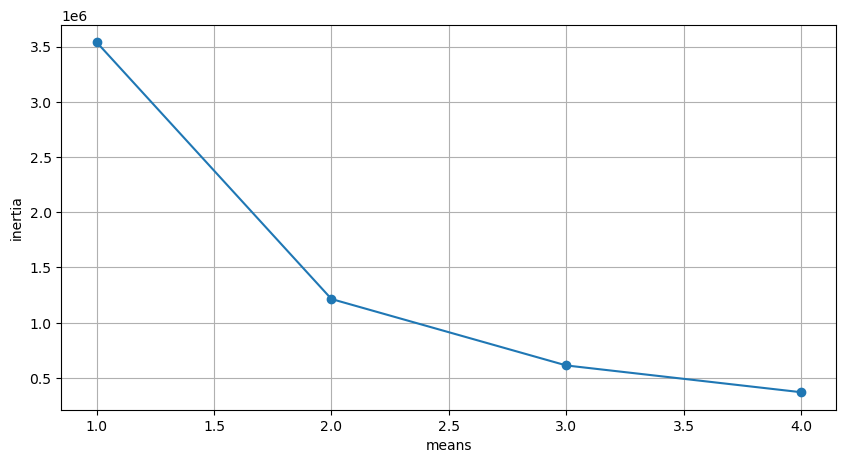

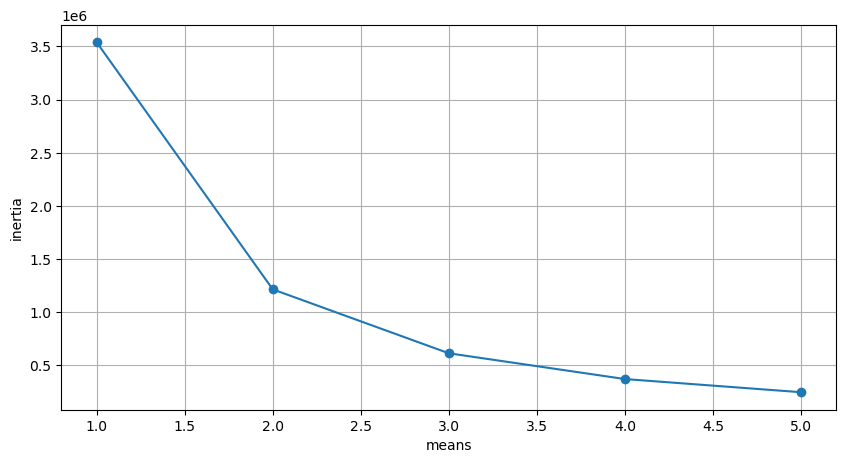

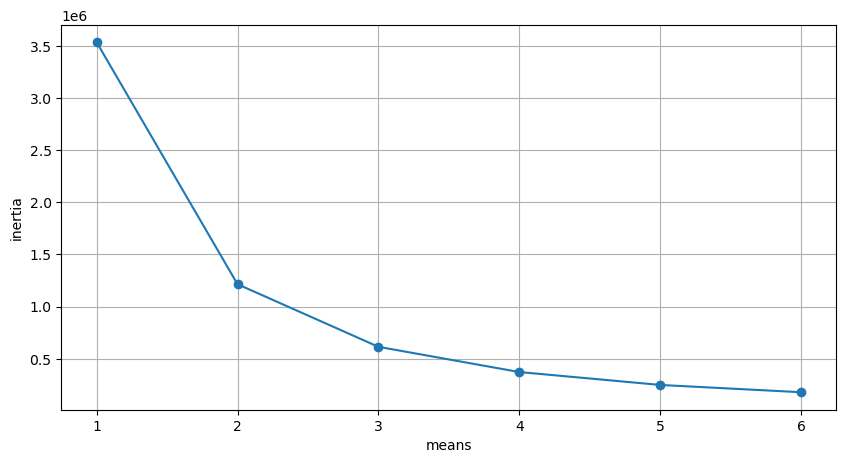

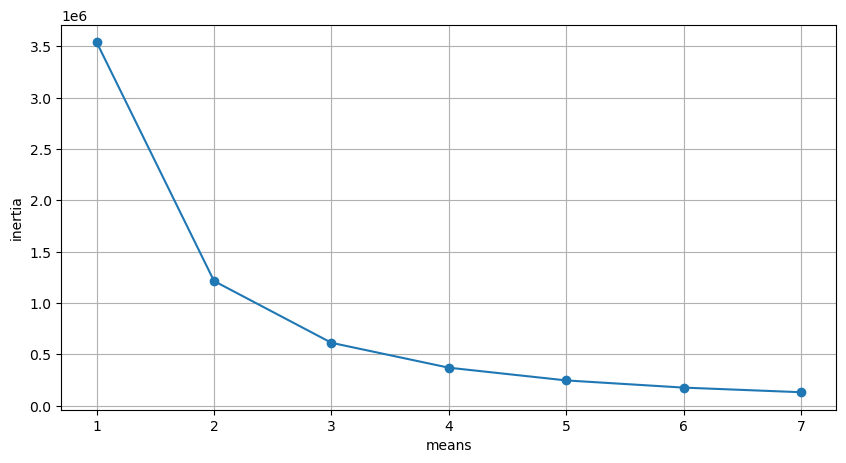

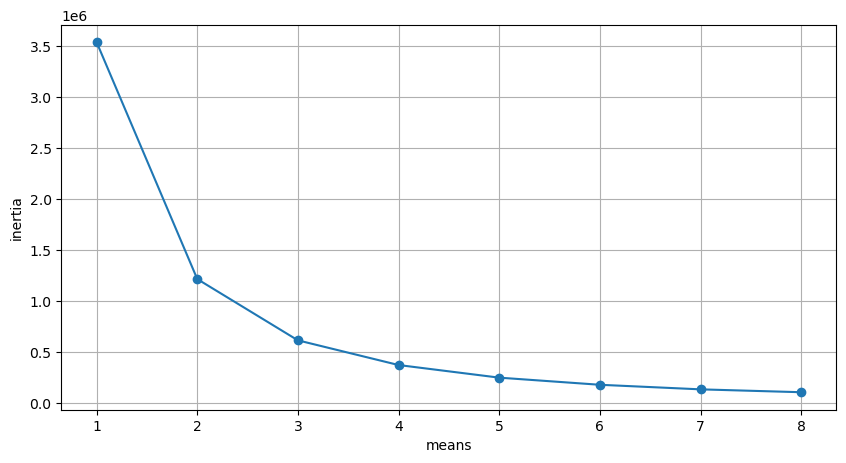

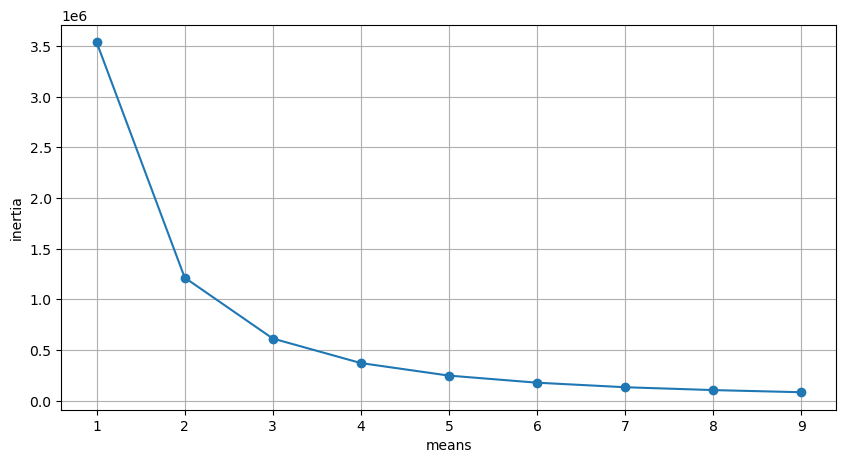

In [9]:
from sklearn.cluster import KMeans
e.best_kmeans(data=train[['final_score']],k_max=10)

In [10]:
final_grade_cluster = e.apply_kmeans(data=train[['final_score']],k=3)

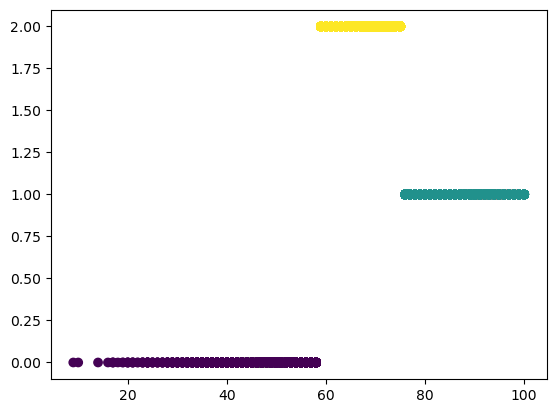

In [11]:
plt.scatter(final_grade_cluster.final_score, y=final_grade_cluster.k_means_3, c=final_grade_cluster.k_means_3)

In [12]:
len(train.final_score) == len(final_grade_cluster.k_means_3)

True

In [13]:
train['cluster_pattern'] = final_grade_cluster['k_means_3']

In [14]:
final_grade_list = ['final_score','cluster_pattern']

In [15]:
final_grade_train = train[final_grade_list]

In [16]:
cluster_zero = final_grade_train[final_grade_train['cluster_pattern']== 0]
cluster_zero.describe()

final_score  cluster_pattern
count  4323.000000           4323.0
mean     49.600972              0.0
std       7.286188              0.0
min       9.000000              0.0
25%      46.000000              0.0
50%      51.000000              0.0
75%      55.000000              0.0
max      58.000000              0.0

In [17]:
cluster_one = final_grade_train[final_grade_train['cluster_pattern']== 1]
cluster_one.describe()

final_score  cluster_pattern
count  5530.000000           5530.0
mean     84.233092              1.0
std       6.263557              0.0
min      76.000000              1.0
25%      79.000000              1.0
50%      83.000000              1.0
75%      89.000000              1.0
max     100.000000              1.0

In [18]:
cluster_two = final_grade_train[final_grade_train['cluster_pattern']== 2]
cluster_two.describe()

final_score  cluster_pattern
count  7300.000000           7300.0
mean     67.096986              2.0
std       4.780041              0.0
min      59.000000              2.0
25%      63.000000              2.0
50%      67.000000              2.0
75%      71.000000              2.0
max      75.000000              2.0

    Some key takeaways:
    - cluster zero:
        - min : 59
        - max: 75
    - cluster one:
        - min: 9 
        - max: 58 
    - cluster_two:
        - min: 76
        - max: 100 

## Now we can assign risk category to each cluster:
    for this we are breaking it down to three categories
        - at risk: This mean that this student is at risk for disproportionately impacted by educational inequalities. 
            - This is best repersented by cluster zero.
        - High risk: These are students who are at the GREATEST RISK for being disproportionately impacted by educational inequalities.
            - this is best repersented by cluster one
        - low risk: these are students who do are not disproportionately impacted by educational inequalities
            - this is best repersetned by cluster two

In [19]:
train.head()

is_male  free_reduced_lunch  test_prep_completed  practicesport  \
30178        0                   0                    1              1   
15705        1                   0                    1              1   
7163         0                   1                    0              1   
4147         0                   0                    1              1   
25763        0                   1                    0              1   

       is_first_child  nrsiblings  rides_bus  final_score  \
30178               0         3.0          0           81   
15705               0         2.0          0           48   
7163                1         4.0          1           52   
4147                1         3.0          0           69   
25763               1         3.0          1           45   

       parent_educ_bachelor's_degree  parent_educ_high_school  \
30178                              0                        0   
15705                              0                        1   
7163                               0                        0   
4147                               0                        0   
25763                              0                        0   

       parent_educ_master's_degree  parent_educ_some_college  \
30178                            0                         1   
15705                            0                         0   
7163                             0                         1   
4147                             1                         0   
25763                            1                         0   

       parent_educ_some_high_school  parent_marital_status_married  \
30178                             0                              1   
15705                             0                              1   
7163                              0                              0   
4147                              0                              1   
25763                             0                              1   

       parent_marital_status_single  parent_marital_status_widowed  \
30178                             0                              0   
15705                             0                              0   
7163                              1                              0   
4147                              0                              0   
25763                             0                              0   

       wkly_study_hours_<_5  wkly_study_hours_>_10 risk_rating  \
30178                     0                      0    low_risk   
15705                     0                      0   high_risk   
7163                      1                      0   high_risk   
4147                      1                      0     at_risk   
25763                     0                      0   high_risk   

       cluster_pattern  
30178                1  
15705                0  
7163                 0  
4147                 2  
25763                0

# Now lets explore feature and see if we can find any patterns 

In [20]:
df.head(3)

is_male  free_reduced_lunch  test_prep_completed  practicesport  \
0        0                   0                    0              1   
1        0                   0                    0              1   
2        0                   0                    0              1   

   is_first_child  nrsiblings  rides_bus  math_score  reading_score  \
0               1         3.0          1          71             71   
1               1         0.0          1          69             90   
2               1         4.0          1          87             93   

   writing_score  final_score  parent_educ_bachelor's_degree  \
0             74           72                              1   
1             88           82                              0   
2             91           90                              0   

   parent_educ_high_school  parent_educ_master's_degree  \
0                        0                            0   
1                        0                            0   
2                        0                            1   

   parent_educ_some_college  parent_educ_some_high_school  \
0                         0                             0   
1                         1                             0   
2                         0                             0   

   parent_marital_status_married  parent_marital_status_single  \
0                              1                             0   
1                              1                             0   
2                              0                             1   

   parent_marital_status_widowed  wkly_study_hours_<_5  wkly_study_hours_>_10  \
0                              0                     1                      0   
1                              0                     0                      0   
2                              0                     1                      0   

  risk_rating  
0     at_risk  
1    low_risk  
2    low_risk

In [21]:
train[['nrsiblings', 'risk_rating']]

nrsiblings risk_rating
30178         3.0    low_risk
15705         2.0   high_risk
7163          4.0   high_risk
4147          3.0     at_risk
25763         3.0   high_risk
...           ...         ...
17210         1.0     at_risk
16733         2.0     at_risk
26266         3.0    low_risk
13470         2.0     at_risk
16834         3.0     at_risk

[17153 rows x 2 columns]

In [22]:
train

is_male  free_reduced_lunch  test_prep_completed  practicesport  \
30178        0                   0                    1              1   
15705        1                   0                    1              1   
7163         0                   1                    0              1   
4147         0                   0                    1              1   
25763        0                   1                    0              1   
...        ...                 ...                  ...            ...   
17210        0                   1                    0              1   
16733        1                   1                    1              1   
26266        1                   0                    1              1   
13470        1                   0                    0              1   
16834        0                   1                    0              1   

       is_first_child  nrsiblings  rides_bus  final_score  \
30178               0         3.0          0           81   
15705               0         2.0          0           48   
7163                1         4.0          1           52   
4147                1         3.0          0           69   
25763               1         3.0          1           45   
...               ...         ...        ...          ...   
17210               0         1.0          0           64   
16733               1         2.0          0           75   
26266               0         3.0          1           89   
13470               1         2.0          0           59   
16834               1         3.0          1           70   

       parent_educ_bachelor's_degree  parent_educ_high_school  \
30178                              0                        0   
15705                              0                        1   
7163                               0                        0   
4147                               0                        0   
25763                              0                        0   
...                              ...                      ...   
17210                              0                        0   
16733                              0                        0   
26266                              0                        0   
13470                              0                        0   
16834                              0                        0   

       parent_educ_master's_degree  parent_educ_some_college  \
30178                            0                         1   
15705                            0                         0   
7163                             0                         1   
4147                             1                         0   
25763                            1                         0   
...                            ...                       ...   
17210                            0                         0   
16733                            1                         0   
26266                            0                         1   
13470                            0                         0   
16834                            0                         0   

       parent_educ_some_high_school  parent_marital_status_married  \
30178                             0                              1   
15705                             0                              1   
7163                              0                              0   
4147                              0                              1   
25763                             0                              1   
...                             ...                            ...   
17210                             0                              0   
16733                             0                              0   
26266                             0                              1   
13470                             0                              0   
16834                             1                              

<Figure size 1200x800 with 0 Axes>

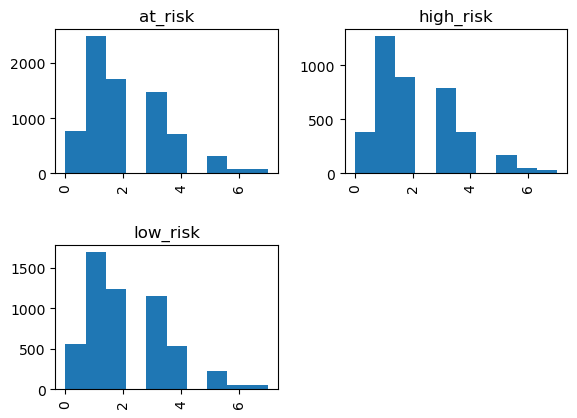

In [23]:
plt.figure(figsize=(12,8))
train.nrsiblings.hist(by=train.risk_rating)
plt.show()

<Figure size 1200x800 with 0 Axes>

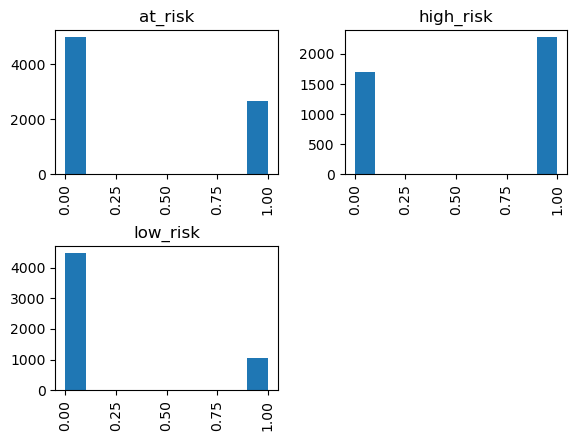

In [24]:
plt.figure(figsize=(12,8))
train.free_reduced_lunch.hist(by=train.risk_rating)
plt.xlabel('free or reduce lunch')

plt.show()

## Parents Education 

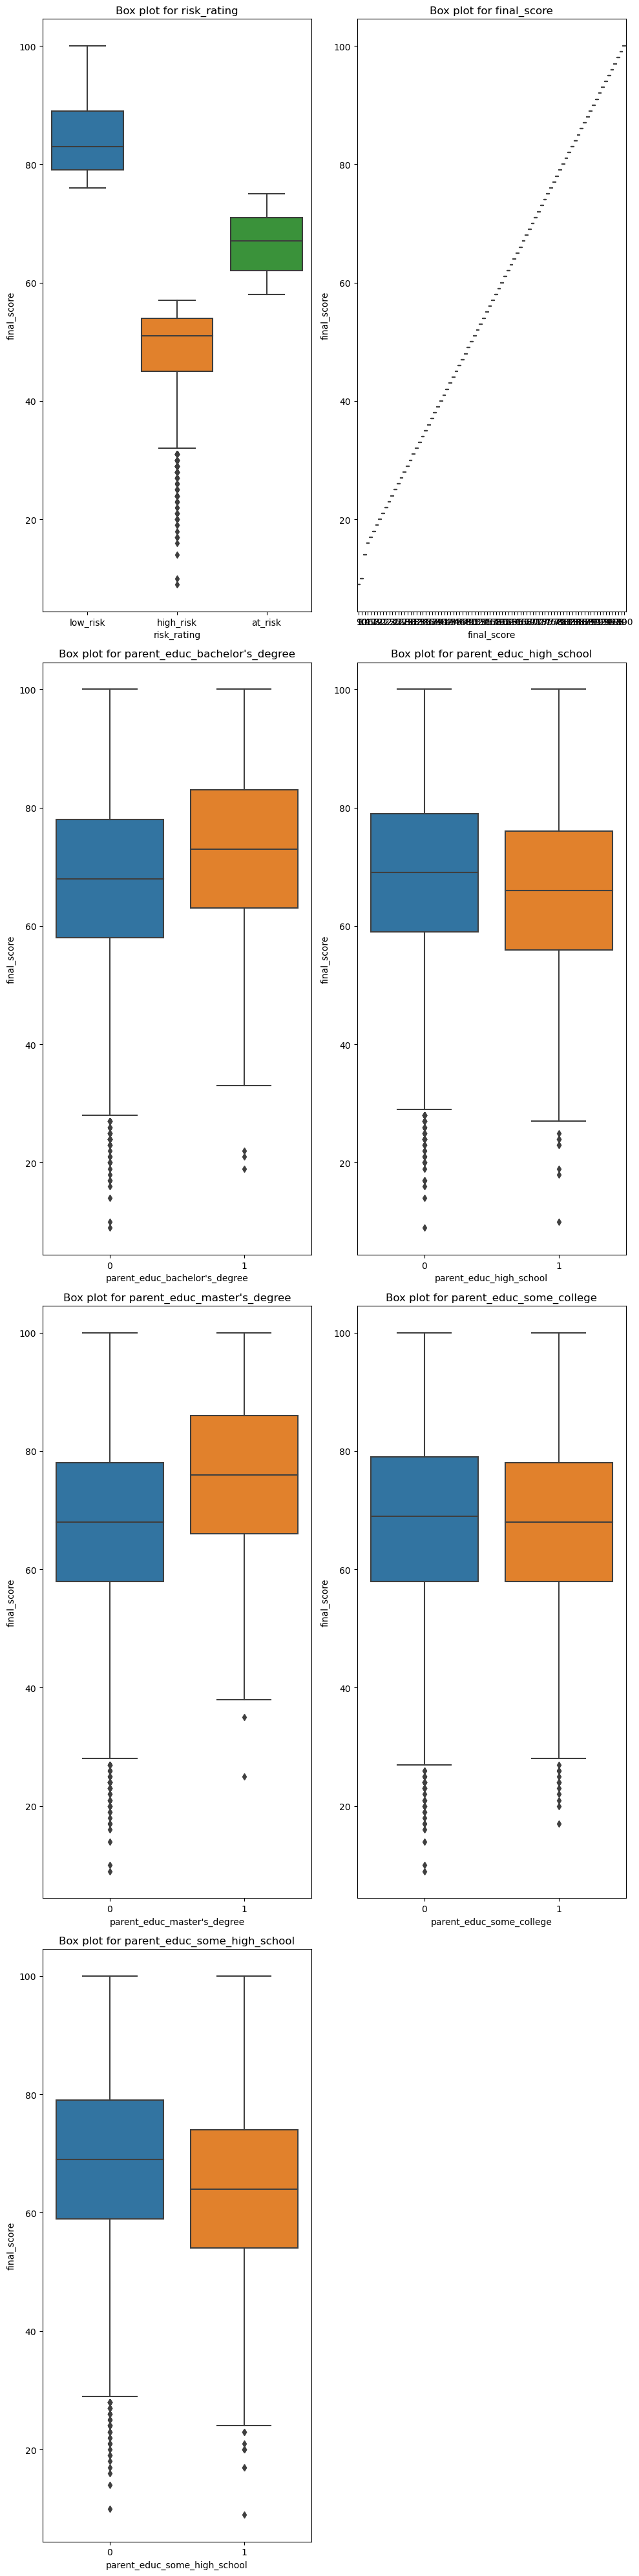

In [25]:
parents_edu = list()
parents_edu.append('risk_rating')
parents_edu.append('final_score')

for cols in train.columns:
    if 'parent_educ' in cols:
        parents_edu.append(cols)
    else:
        pass

# Calculate the number of rows and columns for the subplots grid
num_plots = len(parents_edu)
cols = 2
rows = num_plots // cols if num_plots % cols == 0 else (num_plots // cols) + 1

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 10 * rows))

for idx, edu in enumerate(parents_edu):
    row, col = idx // cols, idx % cols
    ax = axes[row, col]
    sns.boxplot(data=train, x=f'{edu}', y="final_score", ax=ax)
    ax.set_title(f'Box plot for {edu}')
    ax.set_xlabel(f'{edu}')
    ax.set_ylabel('final_score')

# Adjust layout and remove any unused subplots
fig.tight_layout()
for r in range(rows):
    for c in range(cols):
        if r * cols + c >= num_plots:
            axes[r, c].remove()

plt.show()


In [26]:
parents_edu.append('risk_rating')
parents_edu.append('final_score')
parents_edu_df = df[parents_edu]

In [27]:
# sns.pairplot(parents_edu_df,corner=True, hue='risk_rating')

In [28]:
train.columns

Index(['is_male', 'free_reduced_lunch', 'test_prep_completed', 'practicesport',
       'is_first_child', 'nrsiblings', 'rides_bus', 'final_score',
       'parent_educ_bachelor's_degree', 'parent_educ_high_school',
       'parent_educ_master's_degree', 'parent_educ_some_college',
       'parent_educ_some_high_school', 'parent_marital_status_married',
       'parent_marital_status_single', 'parent_marital_status_widowed',
       'wkly_study_hours_<_5', 'wkly_study_hours_>_10', 'risk_rating',
       'cluster_pattern'],
      dtype='object')

## Test Prep completed

<Axes: xlabel='test_prep_completed', ylabel='final_score'>

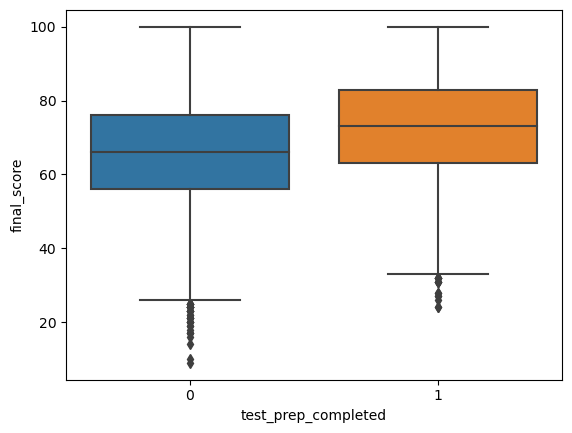

In [29]:
sns.boxplot(train, x='test_prep_completed', y='final_score')

## Number of siblings

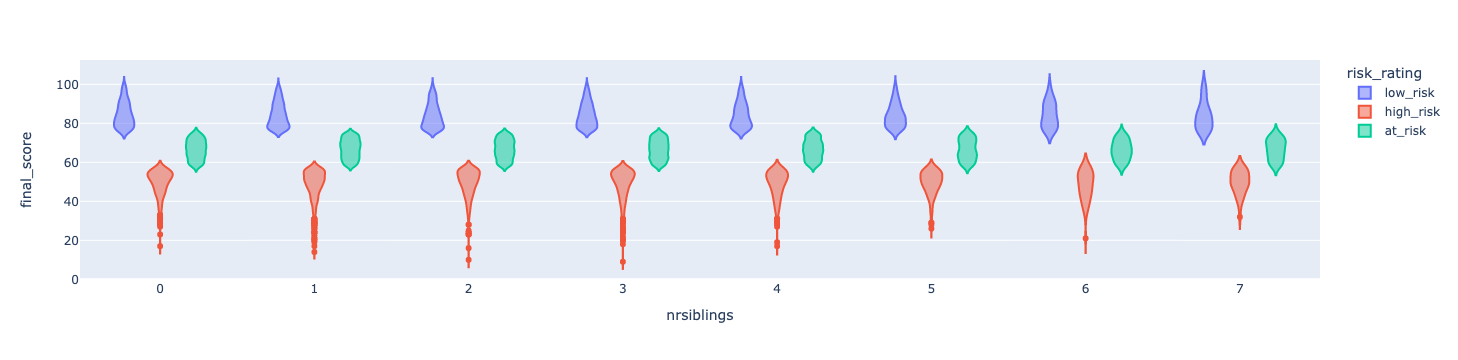

In [30]:
plotly.express.violin(data_frame=train, x='nrsiblings', y='final_score', color='risk_rating')

<Axes: xlabel='nrsiblings', ylabel='final_score'>

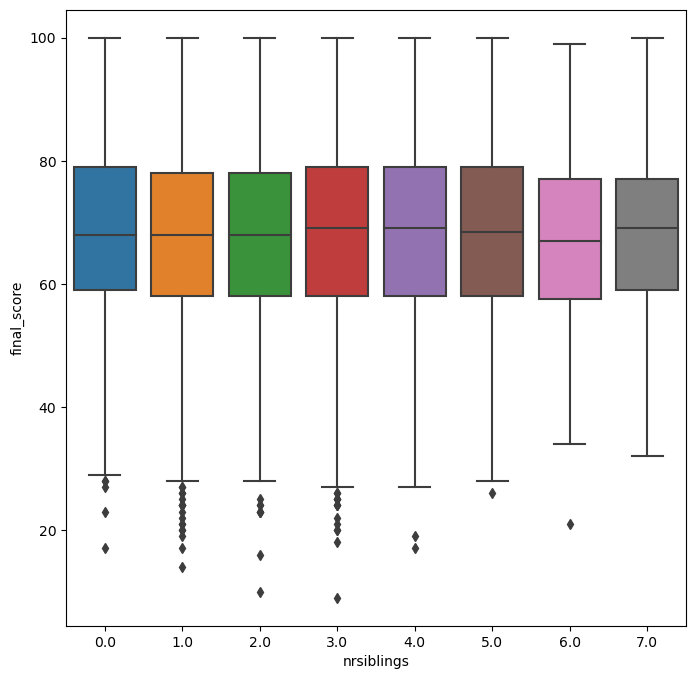

In [31]:
plt.figure(figsize=(8,8))
sns.boxplot(data=train, x="nrsiblings", y="final_score")

# Free and Reduced Lunch

In [32]:
free_reduce_df = train[train['free_reduced_lunch'] == 1]

In [33]:
standard_lunch = train[train['free_reduced_lunch'] == 0]

In [34]:
free_reduce_df.risk_rating.value_counts()

at_risk      2669
high_risk    2278
low_risk     1060
Name: risk_rating, dtype: int64

In [35]:
free_reduce_df['final_score'].mean()

62.02513733977027

In [36]:
standard_lunch['final_score'].mean()

71.54647407141576

In [37]:
standard_lunch.risk_rating.value_counts()

at_risk      4976
low_risk     4470
high_risk    1700
Name: risk_rating, dtype: int64

<Axes: >

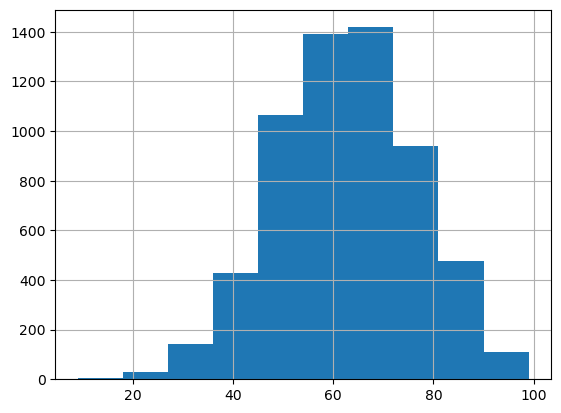

In [38]:
free_reduce_df['final_score'].hist()

<Axes: >

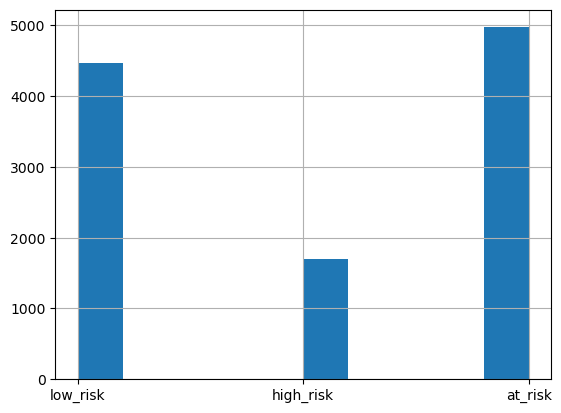

In [39]:
standard_lunch['risk_rating'].hist()

## Here are my hypothesis.
    H$_0$: Free or reduced lunch has no affect on final score.
    H$_0$: Free or reduced lunch has some  affect on final score.


Shapiro-Wilk test p-value for free/reduced lunch students: 8.851850363811309e-10
Shapiro-Wilk test p-value for standard lunch students: 1.2070278669252559e-23


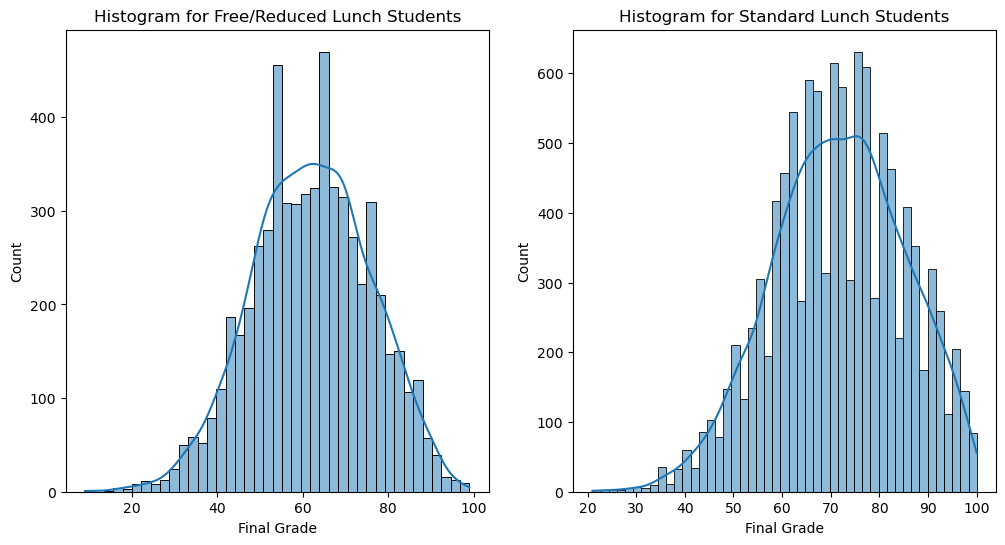

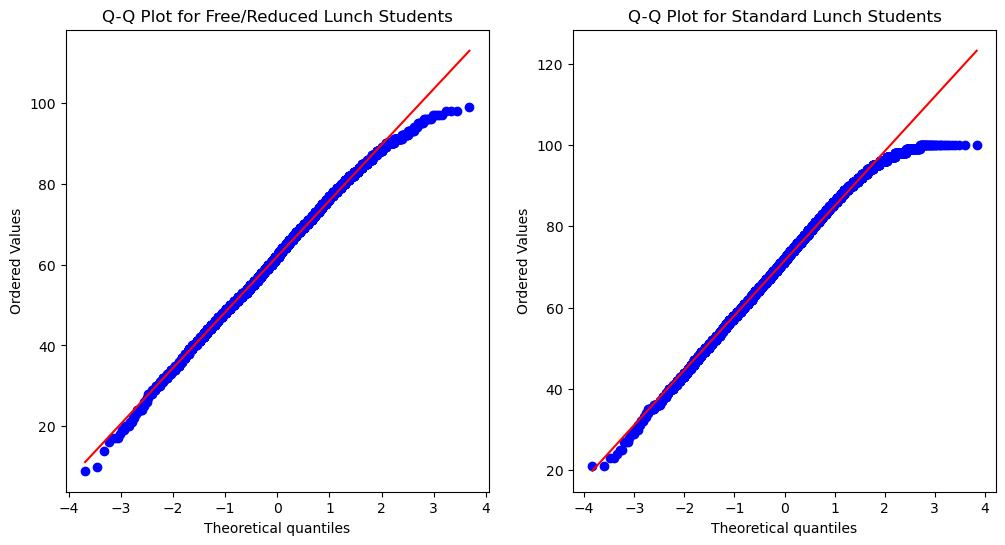

Levene's test p-value: 0.09633852496726257


In [44]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'data' with columns 'is_free_reduced_lunch' and 'final_grade'
free_reduced_students = train[train['free_reduced_lunch'] == 1]['final_score']
standard_students = train[train['free_reduced_lunch'] == 0]['final_score']

# Check for independence (assuming you have a valid dataset with independent groups)

# Check for normality using Shapiro-Wilk test
_, p_value_free_reduced = stats.shapiro(free_reduced_students)
_, p_value_standard = stats.shapiro(standard_students)

print("Shapiro-Wilk test p-value for free/reduced lunch students:", p_value_free_reduced)
print("Shapiro-Wilk test p-value for standard lunch students:", p_value_standard)

# Check for normality visually using histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(free_reduced_students, kde=True)
plt.title("Histogram for Free/Reduced Lunch Students")
plt.xlabel("Final Grade")

plt.subplot(1, 2, 2)
sns.histplot(standard_students, kde=True)
plt.title("Histogram for Standard Lunch Students")
plt.xlabel("Final Grade")
plt.show()

# Check for normality visually using Q-Q plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(free_reduced_students, plot=plt)
plt.title("Q-Q Plot for Free/Reduced Lunch Students")

plt.subplot(1, 2, 2)
stats.probplot(standard_students, plot=plt)
plt.title("Q-Q Plot for Standard Lunch Students")
plt.show()

# Check for homogeneity of variances using Levene's test
_, p_value_levene = stats.levene(free_reduced_students, standard_students)
print("Levene's test p-value:", p_value_levene)

In [46]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame named 'data' with columns 'is_free_reduced_lunch' and 'final_score'
free_reduced_students = df[df['free_reduced_lunch'] == 1]['final_score']
standard_students = df[df['free_reduced_lunch'] == 0]['final_score']

# Perform the Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(free_reduced_students, standard_students, alternative='two-sided')

print("Mann-Whitney U test statistic:", u_statistic)
print("Mann-Whitney U test p-value:", p_value)


Mann-Whitney U test statistic: 66887488.0
Mann-Whitney U test p-value: 0.0


In [47]:
alpha = 0.05

In [48]:
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')


Reject the null hypothesis


### Data Analysis: Comparing Final Scores Between Free/Reduced Lunch Students and Standard Lunch Students

#### Assign Significance Level (Alpha)
alpha = 0.05

#### Assumption Checks

##### Shapiro-Wilk Test for Normality
- Free/reduced lunch students: p-value = 8.85e-10
- Standard lunch students: p-value = 1.21e-23

Both p-values are smaller than the chosen alpha (0.05), indicating that the final scores for both groups are not normally distributed. The normality assumption is violated.

##### Levene's Test for Homogeneity of Variances
- p-value = 0.0963

The p-value is greater than the chosen alpha (0.05), indicating that we cannot conclude there is a significant difference in variances between the two groups. The assumption of equal variances seems reasonable.

#### Appropriate Hypothesis Test: Mann-Whitney U Test

Mann-Whitney U test statistic: 66,887,488
Mann-Whitney U test p-value: 0.0

The p-value is smaller than the chosen alpha (0.05), which means you can reject the null hypothesis. The results suggest that there is a significant difference in final scores between the two groups of students (free/reduced lunch students and standard lunch students).

### Conclusion

Due to the violation of the normality assumption, we used the Mann-Whitney U test to compare the final scores between the two groups. The results indicate that there is a significant difference in final scores between free/reduced lunch students and standard lunch students. Further analysis (e.g., comparing the median scores of the two groups) can help understand the nature of this difference.
